In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import sys
np.set_printoptions(threshold=sys.maxsize)

# gpus = tf.config.experimental.list_physical_devices('GPU')
# print(gpus)
# if gpus:
#     try:
#         tf.config.experimental.set_virtual_device_configuration(gpus[0],[tf.config.experimental.VirtualDeviceConfiguration(memory_limit=4096)])
#     except RuntimeError as e:
#         print(e)

In [2]:
numdat = 10000

with open('bcx_10k_128test.bin','rb') as bcx:
    fix_x = np.fromfile(bcx,dtype='float32',count=-1)
    fix_x = fix_x.reshape(33,33*numdat)
    
with open('bcy_10k_128test.bin','rb') as bcy:
    fix_y = np.fromfile(bcy,dtype='float32',count=-1)
    fix_y = fix_y.reshape(33,33*numdat)
    
with open('fx_10k_128test.bin','rb') as fx:
    force_x = np.fromfile(fx,dtype='float32',count=-1)
    force_x = force_x.reshape(33,33*numdat)
    
with open('fy_10k_128test.bin','rb') as fy:
    force_y = np.fromfile(fy,dtype='float32',count=-1)
    force_y = force_y.reshape(33,33*numdat)

with open('opt_10k_128test.bin','rb') as opt:
    optimal = np.fromfile(opt,dtype='float32',count=-1)
    optimal = optimal.reshape(128,128*numdat)

with open('vol_10k_128test.bin','rb') as vol:
    v = np.fromfile(vol,dtype='float32',count=-1)
    v = v.reshape(numdat,1,1,1)
    
adddata = 40000

with open('bcx_40k_128.bin','rb') as bcx2:
    fix_x2 = np.fromfile(bcx2,dtype='float32',count=-1)
    fix_x2 = fix_x2.reshape(33,33*adddata)
    
with open('bcy_40k_128.bin','rb') as bcy2:
    fix_y2 = np.fromfile(bcy2,dtype='float32',count=-1)
    fix_y2 = fix_y2.reshape(33,33*adddata)
    
with open('fx_40k_128.bin','rb') as fx2:
    force_x2 = np.fromfile(fx2,dtype='float32',count=-1)
    force_x2 = force_x2.reshape(33,33*adddata)
    
with open('fy_40k_128.bin','rb') as fy2:
    force_y2 = np.fromfile(fy2,dtype='float32',count=-1)
    force_y2 = force_y2.reshape(33,33*adddata)

with open('opt_40k_128.bin','rb') as opt2:
    optimal2 = np.fromfile(opt2,dtype='float32',count=-1)
    optimal2 = optimal2.reshape(128,128*adddata)

with open('vol_40k_128.bin','rb') as vol2:
    v2 = np.fromfile(vol2,dtype='float32',count=-1)
    v2 = v2.reshape(adddata,1,1,1)
    
# fig = plt.figure(figsize = [10,10])
# subplot1= fig.add_subplot(5,1,1)
# test1 = subplot1.imshow(fix_x[:,0:33*8])
# subplot2= fig.add_subplot(5,1,2)
# test2 = subplot2.imshow(fix_y[:,0:33*8])
# subplot3= fig.add_subplot(5,1,3)
# test3 = subplot3.imshow(force_x[:,0:33*8])
# subplot4= fig.add_subplot(5,1,4)
# test4 = subplot4.imshow(force_y[:,0:33*8])
# subplot5= fig.add_subplot(5,1,5)
# test5 = subplot5.imshow(optimal[:,0:32*8])
# print(v[0:8,0,0,0])

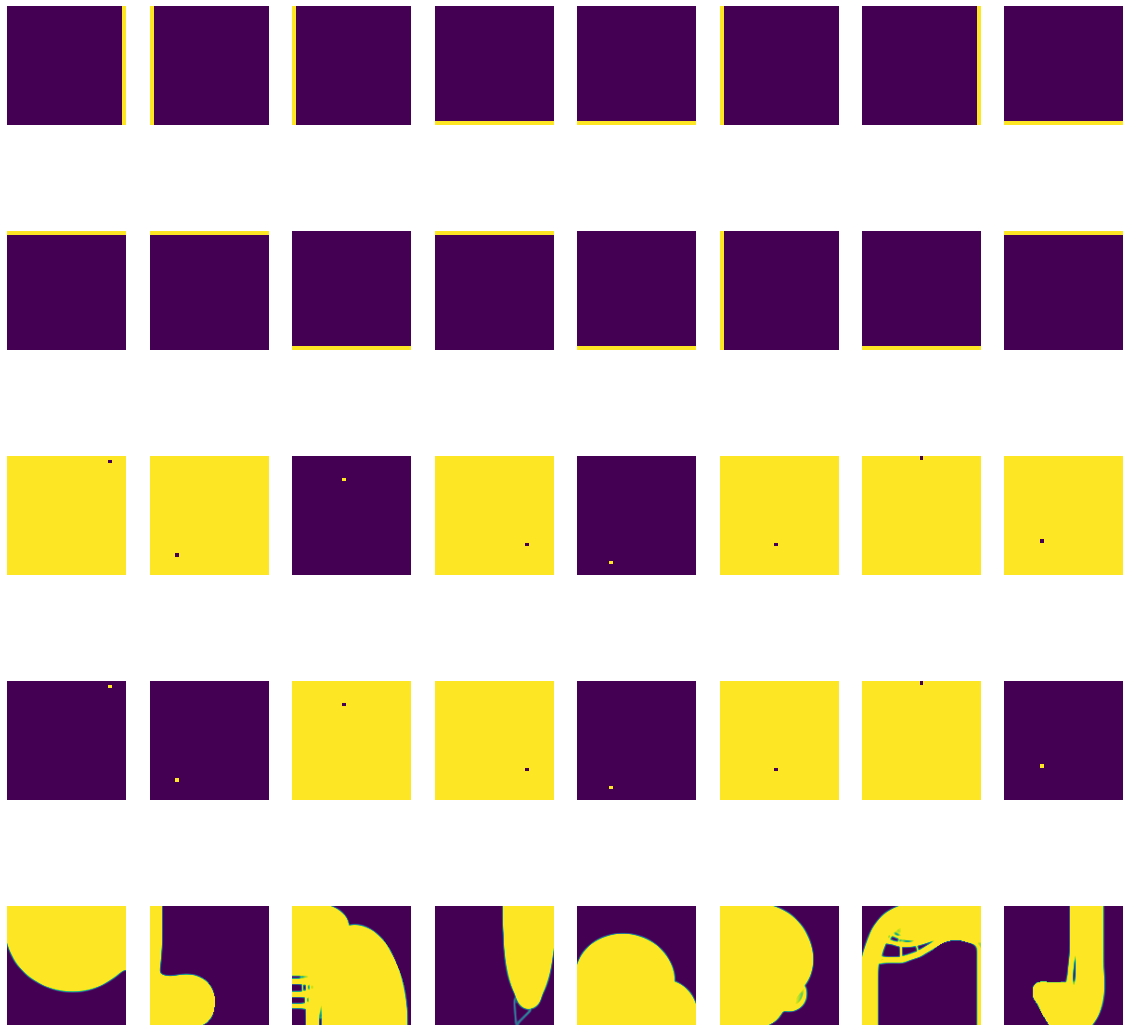

In [3]:
FIX_X = fix_x.reshape(-1,33,33*numdat,1).transpose([0,2,1,3]).reshape(-1,33,33,1)
FIX_Y = fix_y.reshape(-1,33,33*numdat,1).transpose([0,2,1,3]).reshape(-1,33,33,1)
FORCE_X = force_x.reshape(-1,33,33*numdat,1).transpose([0,2,1,3]).reshape(-1,33,33,1)
FORCE_Y = force_y.reshape(-1,33,33*numdat,1).transpose([0,2,1,3]).reshape(-1,33,33,1)
VF = np.ones_like(FIX_X)*v
OPTIMAL = optimal.reshape(-1,128,128*numdat,1).transpose([0,2,1,3]).reshape(-1,128,128,1)

FIX_X2 = fix_x2.reshape(-1,33,33*adddata,1).transpose([0,2,1,3]).reshape(-1,33,33,1)
FIX_Y2 = fix_y2.reshape(-1,33,33*adddata,1).transpose([0,2,1,3]).reshape(-1,33,33,1)
FORCE_X2 = force_x2.reshape(-1,33,33*adddata,1).transpose([0,2,1,3]).reshape(-1,33,33,1)
FORCE_Y2 = force_y2.reshape(-1,33,33*adddata,1).transpose([0,2,1,3]).reshape(-1,33,33,1)
VF2 = np.ones_like(FIX_X2)*v2
OPTIMAL2 = optimal2.reshape(-1,128,128*adddata,1).transpose([0,2,1,3]).reshape(-1,128,128,1)

fix_x_con = np.concatenate((FIX_X,FIX_X2),axis=0)
fix_y_con = np.concatenate((FIX_Y,FIX_Y2),axis=0)
force_x_con = np.concatenate((FORCE_X,FORCE_X2),axis=0)
force_y_con = np.concatenate((FORCE_Y,FORCE_Y2),axis=0)
opt_con = np.concatenate((OPTIMAL,OPTIMAL2),axis=0)
v_con = np.concatenate((VF,VF2),axis=0)

data = np.concatenate((fix_x_con,fix_y_con,force_x_con,force_y_con,v_con),axis=3)
train_data = data[:int((numdat+adddata)*0.8),:,:,:]
test_data = data[int((numdat+adddata)*0.8):,:,:,:]

train_opt = opt_con[:int((numdat+adddata)*0.8),:,:,:]
test_opt = opt_con[int((numdat+adddata)*0.8):,:,:,:]

# fig2 = plt.figure(figsize = [20,20])
# for i in range(8):
#     sp = fig2.add_subplot(5,8,i+1)
#     t = sp.imshow(FIX_X[i,:,:,0])
#     plt.axis('off')
#     sp = fig2.add_subplot(5,8,i+1+8)
#     t = sp.imshow(FIX_Y[i,:,:,0])
#     plt.axis('off')
#     sp = fig2.add_subplot(5,8,i+1+16)
#     t = sp.imshow(FORCE_X[i,:,:,0])
#     plt.axis('off')
#     sp = fig2.add_subplot(5,8,i+1+24)
#     t = sp.imshow(FORCE_Y[i,:,:,0])
#     plt.axis('off')
#     sp = fig2.add_subplot(5,8,i+1+32)
#     t = sp.imshow(OPTIMAL[i,:,:,0])
#     plt.axis('off')

In [4]:
x = tf.keras.Input(shape=(33,33,5), dtype='float32')

c1 = tf.keras.layers.Conv2D(filters=64, kernel_size=(2,2), strides=(1, 1), padding='valid', activation='relu', use_bias=True)(x)
c2 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1, 1), padding='same', activation='relu', use_bias=True)(c1)
c2_add = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1, 1), padding='same', activation='relu', use_bias=True)(c2)
c2_add2 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1, 1), padding='same', activation='relu', use_bias=True)(c2_add)
c2_add3 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1, 1), padding='same', activation='relu', use_bias=True)(c2_add2)
c2_add4 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1, 1), padding='same', activation='relu', use_bias=True)(c2_add3)
m1 = tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2,2), padding='valid')(c2_add4)

c3 = tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1, 1), padding='same', activation='relu', use_bias=True)(m1)
c4 = tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1, 1), padding='same', activation='relu', use_bias=True)(c3)
c4_add = tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1, 1), padding='same', activation='relu', use_bias=True)(c4)
c4_add2 = tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1, 1), padding='same', activation='relu', use_bias=True)(c4_add)
c4_add3 = tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1, 1), padding='same', activation='relu', use_bias=True)(c4_add2)
c4_add4 = tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1, 1), padding='same', activation='relu', use_bias=True)(c4_add3)
m2 = tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2,2), padding='valid')(c4_add4)

c5 = tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1, 1), padding='same', activation='relu', use_bias=True)(m2)
c6 = tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1, 1), padding='same', activation='relu', use_bias=True)(c5)
c6_add = tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1, 1), padding='same', activation='relu', use_bias=True)(c6)
c6_add2 = tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1, 1), padding='same', activation='relu', use_bias=True)(c6_add)
c6_add3 = tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1, 1), padding='same', activation='relu', use_bias=True)(c6_add2)
c6_add4 = tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1, 1), padding='same', activation='relu', use_bias=True)(c6_add3)
m3 = tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2,2), padding='valid')(c6_add4)

f1 = tf.keras.layers.Flatten()(m3)
f2 = tf.keras.layers.Dense(1024)(f1)
f3 = tf.keras.layers.Dense(4*4*1024)(f2)
f4 = tf.keras.layers.Reshape([4,4,1024])(f3)

u1 = tf.keras.layers.UpSampling2D(size=(2,2),interpolation='nearest')(f4)
c7 = tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1, 1), padding='same', activation='relu', use_bias=True)(u1)
c8 = tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1, 1), padding='same', activation='relu', use_bias=True)(c7)

u2 = tf.keras.layers.UpSampling2D(size=(2,2),interpolation='nearest')(c8)
c9 = tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1, 1), padding='same', activation='relu', use_bias=True)(u2)
c10 = tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1, 1), padding='same', activation='relu', use_bias=True)(c9)

u3 = tf.keras.layers.UpSampling2D(size=(2,2),interpolation='nearest')(c10)
c11 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1, 1), padding='same', activation='relu', use_bias=True)(u3)
c12 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1, 1), padding='same', activation='relu', use_bias=True)(c11)

u4 = tf.keras.layers.UpSampling2D(size=(2,2),interpolation='nearest')(c12)
c13 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1, 1), padding='same', activation='relu', use_bias=True)(u4)
c14 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1, 1), padding='same', activation='relu', use_bias=True)(c13)

u5 = tf.keras.layers.UpSampling2D(size=(2,2),interpolation='nearest')(c14)
c15 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1, 1), padding='same', activation='relu', use_bias=True)(u5)
c16 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1, 1), padding='same', activation='relu', use_bias=True)(c15)

c17 = tf.keras.layers.Conv2D(filters=1, kernel_size=(3,3), strides=(1, 1), padding='same', activation='sigmoid', use_bias=True)(c16)

Model: "Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 33, 33, 5)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 64)        1344      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 64)        36928 

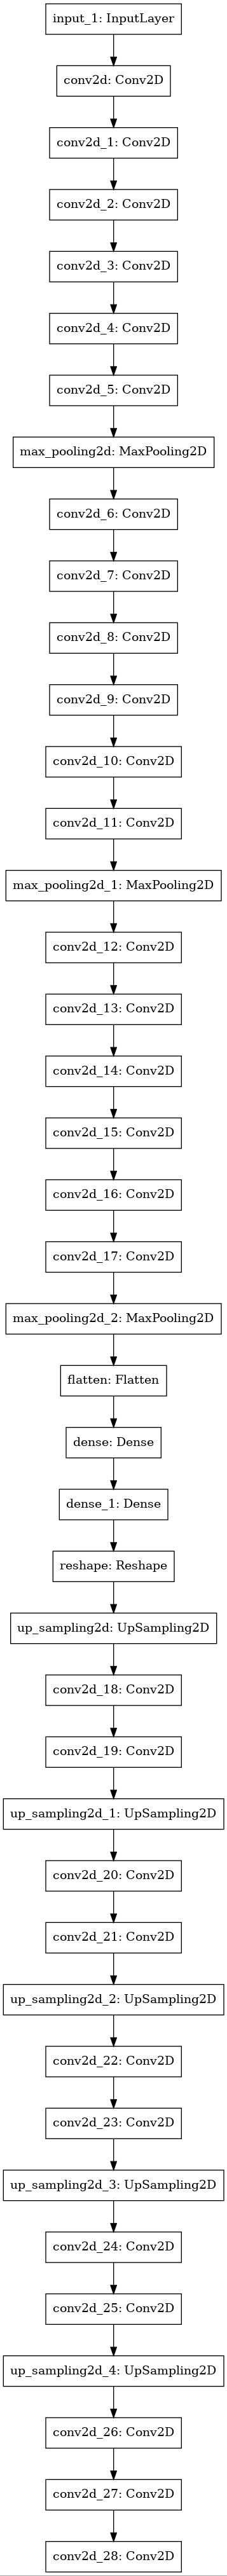

In [5]:
model = tf.keras.Model(inputs = x, outputs = c17, name = 'Model')
model.compile(optimizer = tf.keras.optimizers.Adam(lr=0.00005), loss = tf.keras.losses.MeanAbsoluteError())
model.summary()
tf.keras.utils.plot_model(model,to_file='model_128.jpg')

In [6]:
fitting = model.fit(x = train_data, y=train_opt, batch_size = 64, epochs = 500)

Train on 40000 samples
Epoch 1/500
40000/40000 [==============================] - 63s 2ms/sample - loss: 0.3383
Epoch 2/500
40000/40000 [==============================] - 58s 1ms/sample - loss: 0.2338
Epoch 3/500
40000/40000 [==============================] - 58s 1ms/sample - loss: 0.2202
Epoch 4/500
40000/40000 [==============================] - 58s 1ms/sample - loss: 0.2121
Epoch 5/500
40000/40000 [==============================] - 58s 1ms/sample - loss: 0.1980
Epoch 6/500
40000/40000 [==============================] - 58s 1ms/sample - loss: 0.1741
Epoch 7/500
40000/40000 [==============================] - 58s 1ms/sample - loss: 0.1491
Epoch 8/500
40000/40000 [==============================] - 58s 1ms/sample - loss: 0.1370
Epoch 9/500
40000/40000 [==============================] - 58s 1ms/sample - loss: 0.1294
Epoch 10/500
40000/40000 [==============================] - 58s 1ms/sample - loss: 0.1256
Epoch 11/500
40000/40000 [==============================] - 58s 1ms/sample - loss: 0.1

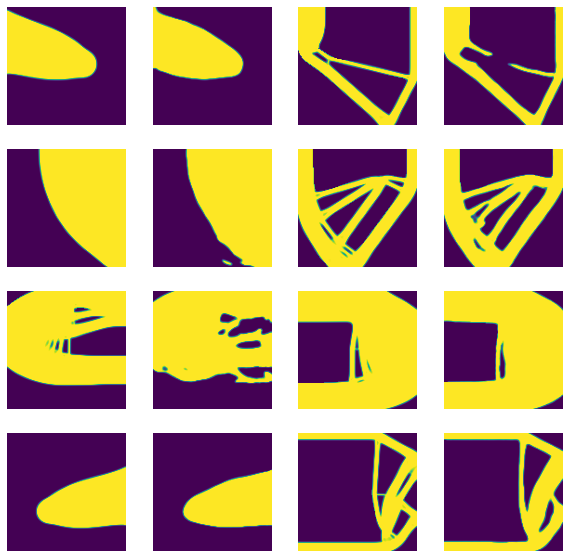

In [17]:
opt_predicted = model.predict(test_data)
fig = plt.figure(figsize =(10,10))
for i in range(8):
    tmp_ind = np.random.randint(low=0,high=test_data.shape[0],size=1)
    sp = fig.add_subplot(4,4,(2*(i+1)-1))
    sp.imshow(test_opt[tmp_ind[0],:,:,0])
    sp.axis('off')
    sp = fig.add_subplot(4,4,(2*(i+1)))
    sp.imshow(opt_predicted[tmp_ind[0],:,:,0])
    sp.axis('off')

(-0.5, 127.5, 127.5, -0.5)

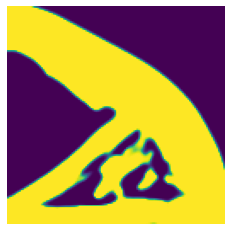

In [13]:
fix_x_test = np.zeros([1,33,33,1])
fix_x_test[0,:,0,0] = 1
fix_y_test = np.zeros([1,33,33,1])
fix_y_test[0,:,0,0] = 1
force_x_test = np.zeros([1,33,33,1])
force_y_test = np.zeros([1,33,33,1])
force_y_test[0,32,32,0] = -1
vf_test = 0.5*np.ones([1,33,33,1])

test_input = np.concatenate((fix_x_test,fix_y_test,force_x_test,force_y_test,vf_test),axis=3)
mbb_predicted = model.predict(test_input)
plt.imshow(mbb_predicted[0,:,:,0])
plt.axis('off')

In [9]:
model.save("ver.6_128.h5")

In [10]:
model_loaded = tf.keras.models.load_model("ver.6_128.h5")

(-0.5, 127.5, 127.5, -0.5)

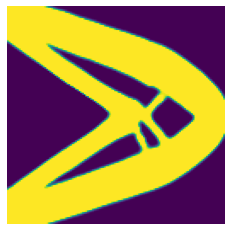

In [11]:
fix_x_load = np.zeros([1,33,33,1])
fix_x_load[0,:,0,0] = 1
fix_y_load = np.zeros([1,33,33,1])
fix_y_load[0,:,0,0] = 1
force_x_load = np.zeros([1,33,33,1])
force_y_load = np.zeros([1,33,33,1])
force_y_load[0,16,32,0] = -1
vf_load = 0.5*np.ones([1,33,33,1])

test_input_load = np.concatenate((fix_x_load,fix_y_load,force_x_load,force_y_load,vf_load),axis=3)
mbb_loaded_predicted = model_loaded.predict(test_input_load)
plt.imshow(mbb_loaded_predicted[0,:,:,0])
plt.axis('off')

Text(0.5, 1.0, 'Training Loss')

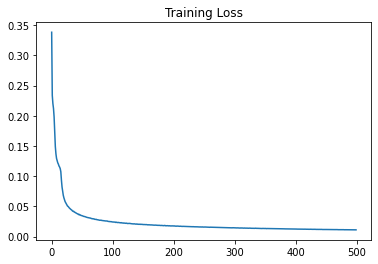

In [12]:
plt.plot(fitting.history['loss'])
plt.title('Training Loss')